<a href="https://colab.research.google.com/github/BileOara/REGRESSION/blob/master/Pred_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyClassifier
from sklearn import metrics
%matplotlib inline

In [0]:
dataset = pd.read_csv('Train.csv')

In [5]:
dataset.head(20)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4.0,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16.0,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3.0,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9.0,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9.0,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,3:08:57 PM,14,5,3:21:36 PM,14,5,3:30:30 PM,14,5,4:23:41 PM,9.0,27.2,NaN,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191.0
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,9:49:47 AM,9,5,9:53:12 AM,9,5,9:56:45 AM,9,5,10:19:45 AM,5.0,20.3,NaN,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380.0
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,2:13:01 PM,11,1,2:14:13 PM,11,1,2:21:33 PM,11,1,2:22:40 PM,11,1,2:33:26 PM,3.0,28.7,NaN,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646.0
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,11:15:49 AM,30,2,12:13:18 PM,30,2,12:22:57 PM,30,2,1:19:35 PM,9.0,NaN,NaN,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398.0
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,4:48:54 PM,23,5,5:17:56 PM,23,5,5:32:41 PM,23,5,5:34:38 PM,23,5,6:31:57 PM,14.0,24.6,NaN,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439.0


In [6]:
dataset.shape

(5426, 29)

In [7]:
dataset.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5425.000000,4319.000000,142.000000,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000
mean,2.749539,15.605971,3.235717,15.606156,3.235901,15.606156,3.235901,15.606156,3.235901,15.606156,3.235901,9.577512,23.239546,7.302817,-1.281267,36.811640,-1.282444,36.810460,1582.201843
std,0.625219,8.728296,1.582829,8.728336,1.582627,8.728336,1.582627,8.728336,1.582627,8.728336,1.582627,5.742920,3.606868,14.086178,0.030869,0.037604,0.035349,0.044652,1014.912393
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.300000,0.100000,-1.438302,36.667483,-1.428762,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.500000,1.000000,-1.300968,36.784678,-1.301201,36.784968,885.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.100000,-1.279395,36.807746,-1.284583,36.807334,1393.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,5.000000,-1.257147,36.829741,-1.260972,36.828195,2060.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,31.900000,83.100000,-1.147170,36.980691,-1.030225,37.016779,7883.000000


In [0]:
dataset = dataset.fillna(method='ffill')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   5426 non-null   object 
 1   User Id                                    5426 non-null   object 
 2   Vehicle Type                               5426 non-null   object 
 3   Platform Type                              5426 non-null   int64  
 4   Personal or Business                       5426 non-null   object 
 5   Placement - Day of Month                   5426 non-null   int64  
 6   Placement - Weekday (Mo = 1)               5426 non-null   int64  
 7   Placement - Time                           5426 non-null   object 
 8   Confirmation - Day of Month                5426 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)            5426 non-null   int64  
 10  Confirmation - Time     

In [10]:
dataset.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [0]:
# import the scaling module
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [13]:
# Binning numerical columns
dataset['Pickup_Day_of_Month'] = pd.qcut(dataset.Pickup_Day_of_Month, q=4, labels=False )
dataset['Confirmation_Weekday_Mo1']= pd.qcut(dataset.Confirmation_Weekday_Mo1, q=4, labels=False)
dataset.head(25)

AttributeError: ignored

In [15]:
#df1=dataset.select_dtypes(include=['int64','float64'])
df1 = dataset.drop(['Pickup Lat', 'Pickup Long','Arrival at Destination - Weekday (Mo = 1)', 'Vehicle Type', 'Arrival at Destination - Day of Month', 'Destination Lat', 'Destination Long'], axis='columns')
df1.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [0]:
df1=dataset.select_dtypes(include=['int64','float64'])

In [17]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(df1.drop('Time_from_Pickup_to_Arrival', axis='columns'))
g.fig.set_size_inches(15,15)

KeyError: ignored

In [18]:
X = dataset[['Distance_KM', 'Temperature', 'Pickup_Day_of_Month', 
             'Confirmation_Weekday_Mo1', 'Platform Type']].values
y = dataset['Time_from_Pickup_to_Arrival'].values

KeyError: ignored

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Time_from_Pickup_to_Arrival'])

KeyError: ignored

<Figure size 1080x720 with 0 Axes>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
regressor = LinearRegression(
    fit_intercept=True,
    normalize=True,
    copy_X=True,
    n_jobs=None,
)  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = round(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}),1)
df.head(25)

,Actual,Predicted
0,1670,2135.6
1,648,973.6
2,1081,1596.9
3,2452,2891.8
4,2001,1997.5
5,2549,2711.0
6,4021,3854.9
7,2414,2233.7
8,55,1588.2
9,1823,1481.5


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 545.6548159756115
Mean Squared Error: 618338.690586072
Root Mean Squared Error: 786.3451472388394


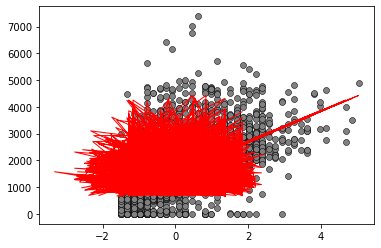

In [0]:
plt.scatter(X_test[:,0], y_test,  color='gray',
    linewidths=0.5,
    verts=None,
    edgecolors='black')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [0]:
from sklearn.metrics import explained_variance_score

In [0]:
print (explained_variance_score(y_test, y_pred))

0.3494456390812867
